In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from numpy.random import random
from time import time
from template import *

In [3]:
df = pd.read_csv('../dataset/iris.csv')
df.tail()

,x1,x2,x3,x4,y
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


# Train val split

In [4]:
X_train, y_train, X_val, y_val = split(df, 'y')

In [5]:
print(X_train[:5])

[[5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]]


# Declare function

In [30]:
def train(X_train, y_train, epoch, lr, verbose=True):
    now = time()
    np.random.seed(17487)
    W = [random((4, 4)), random((4, 3))]
    b = [random(4), random(3)]
    
    train_loss_hist = np.array([])
    train_acc_hist = np.array([])
    val_loss_hist = np.array([])
    val_acc_hist = np.array([])
    
    for e in range(epoch):
        loss = 0
        
        for i in range(len(X_train)):
            x = X_train[i]
            h = feedforward(X_train[i], W=W[:1], b=b[:1], activations=[sigmoid])
            p = feedforward(h, W = W[1:], b=b[1:], activations=[softmax])
            t = dummy(y_train[i])
            
            g = get_gradient(x, h, p, t, W)
            update(g[0], g[1], g[2], g[3], lr, W, b)
            loss = train_error(feedforward(x, W, b), t)
        
        pred = prediksi(X_val, W, b)
        y_pred_val = pred.argmax(axis = 1)
        acc_val = hitung_akurasi(y_val, y_pred_val)
        val_acc_hist = np.append(val_acc_hist, acc_val)
        
        loss_val = val_error(pred, dummy(y_val))
        val_loss_hist = np.append(val_loss_hist, loss_val)
        
        y_pred_train = prediksi(X_train, W, b).argmax(axis = 1)
        acc_train = hitung_akurasi(y_train, y_pred_train)
        train_acc_hist = np.append(train_acc_hist, acc_train)
        
        loss_train = loss
        train_loss_hist = np.append(train_loss_hist, loss_train)
        
        if verbose:
            print("[{}] train_loss: {:.7f}\t train_acc: {:.7f}\t val_loss: {:.7f}\t val_acc: {:.7f}".\
                  format(e+1, loss_train, acc_train, loss_val, acc_val))
        
    print("\nDone in {:.2f} seconds.".format(time() - now))
    return (train_loss_hist, train_acc_hist, val_loss_hist, val_acc_hist, W, b)

# Train

In [53]:
tl, ta, vl, va, W, b = train(X_train, y_train, epoch=200, lr = 0.8, verbose=True)

[1] train_loss: 0.0026015	 train_acc: 0.3333333	 val_loss: 0.6103408	 val_acc: 0.3333333
[2] train_loss: 0.0025303	 train_acc: 0.3333333	 val_loss: 0.6112030	 val_acc: 0.3333333
[3] train_loss: 0.0025338	 train_acc: 0.3333333	 val_loss: 0.6111577	 val_acc: 0.3333333
[4] train_loss: 0.0025341	 train_acc: 0.3333333	 val_loss: 0.6111518	 val_acc: 0.3333333
[5] train_loss: 0.0025346	 train_acc: 0.3333333	 val_loss: 0.6111431	 val_acc: 0.3333333
[6] train_loss: 0.0025353	 train_acc: 0.3333333	 val_loss: 0.6111333	 val_acc: 0.3333333
[7] train_loss: 0.0025361	 train_acc: 0.3333333	 val_loss: 0.6111220	 val_acc: 0.3333333
[8] train_loss: 0.0025370	 train_acc: 0.3333333	 val_loss: 0.6111089	 val_acc: 0.3333333
[9] train_loss: 0.0025382	 train_acc: 0.3333333	 val_loss: 0.6110936	 val_acc: 0.3333333
[10] train_loss: 0.0025398	 train_acc: 0.3333333	 val_loss: 0.6110752	 val_acc: 0.3333333
[11] train_loss: 0.0025418	 train_acc: 0.3333333	 val_loss: 0.6110529	 val_acc: 0.3333333
[12] train_loss: 0.

[94] train_loss: 0.0004337	 train_acc: 0.8166667	 val_loss: 0.1322342	 val_acc: 0.8000000
[95] train_loss: 0.0004034	 train_acc: 0.6833333	 val_loss: 0.3028256	 val_acc: 0.6666667
[96] train_loss: 0.0008109	 train_acc: 0.6916667	 val_loss: 0.2635897	 val_acc: 0.7000000
[97] train_loss: 0.0011262	 train_acc: 0.8416667	 val_loss: 0.1245125	 val_acc: 0.8000000
[98] train_loss: 0.0007190	 train_acc: 0.7583333	 val_loss: 0.1935080	 val_acc: 0.7333333
[99] train_loss: 0.0003618	 train_acc: 0.8250000	 val_loss: 0.1230870	 val_acc: 0.8000000
[100] train_loss: 0.0006156	 train_acc: 0.8166667	 val_loss: 0.1540506	 val_acc: 0.7666667
[101] train_loss: 0.0002091	 train_acc: 0.6833333	 val_loss: 0.2854177	 val_acc: 0.6666667
[102] train_loss: 0.0007696	 train_acc: 0.8583333	 val_loss: 0.1045088	 val_acc: 0.8000000
[103] train_loss: 0.0006100	 train_acc: 0.7666667	 val_loss: 0.1990570	 val_acc: 0.7333333
[104] train_loss: 0.0003032	 train_acc: 0.8500000	 val_loss: 0.1149273	 val_acc: 0.8000000
[105]

[186] train_loss: 0.0002291	 train_acc: 0.8833333	 val_loss: 0.0855389	 val_acc: 0.8333333
[187] train_loss: 0.0002625	 train_acc: 0.8666667	 val_loss: 0.1145506	 val_acc: 0.8333333
[188] train_loss: 0.0002631	 train_acc: 0.8583333	 val_loss: 0.1312943	 val_acc: 0.8333333
[189] train_loss: 0.0002077	 train_acc: 0.8500000	 val_loss: 0.1519205	 val_acc: 0.8000000
[190] train_loss: 0.0001845	 train_acc: 0.7416667	 val_loss: 0.2636641	 val_acc: 0.7000000
[191] train_loss: 0.0004650	 train_acc: 0.9250000	 val_loss: 0.0258330	 val_acc: 0.9666667
[192] train_loss: 0.0002855	 train_acc: 0.8083333	 val_loss: 0.2025007	 val_acc: 0.7666667
[193] train_loss: 0.0003860	 train_acc: 0.9416667	 val_loss: 0.0119456	 val_acc: 1.0000000
[194] train_loss: 0.0002081	 train_acc: 0.7583333	 val_loss: 0.2465017	 val_acc: 0.7333333
[195] train_loss: 0.0000335	 train_acc: 0.8750000	 val_loss: 0.0792338	 val_acc: 0.8333333
[196] train_loss: 0.0001337	 train_acc: 0.8500000	 val_loss: 0.1511421	 val_acc: 0.8000000

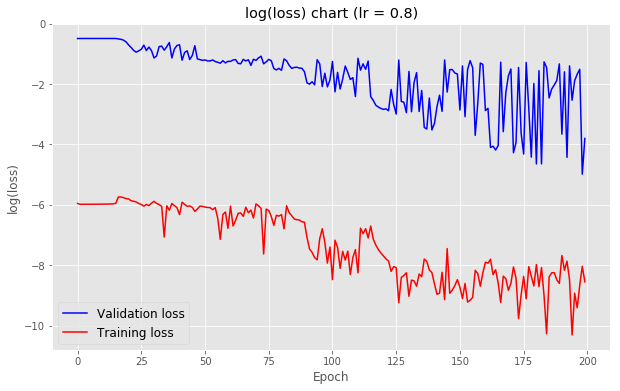

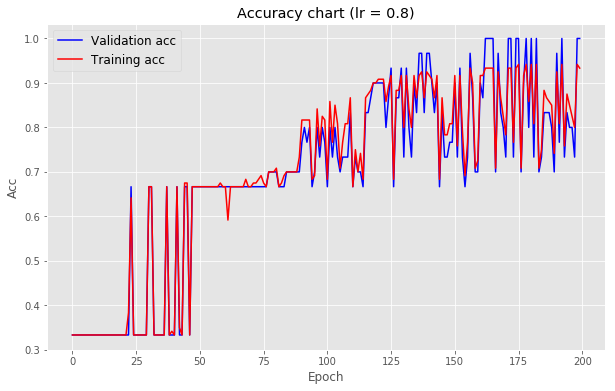

In [55]:
plt.figure(figsize=(10, 6))
plt.plot(np.log(vl), label = 'Validation loss', color='blue')
plt.plot(np.log(tl), label = 'Training loss', color='red')
plt.title('log(loss) chart (lr = 0.8)')
plt.xlabel('Epoch')
plt.ylabel('log(loss)')
plt.legend(fontsize=12)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(va, label = 'Validation acc', color='blue')
plt.plot(ta, label = 'Training acc', color='red')
plt.title('Accuracy chart (lr = 0.8)')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.legend(fontsize=12)
plt.show()

In [56]:
tl2, ta2, vl2, va2, W2, b2 = train(X_train, y_train, epoch=300, lr = 0.1, verbose=True)

[1] train_loss: 0.0574238	 train_acc: 0.3333333	 val_loss: 0.4484757	 val_acc: 0.3333333
[2] train_loss: 0.0465660	 train_acc: 0.3333333	 val_loss: 0.4655708	 val_acc: 0.3333333
[3] train_loss: 0.0463986	 train_acc: 0.3333333	 val_loss: 0.4658949	 val_acc: 0.3333333
[4] train_loss: 0.0464074	 train_acc: 0.3333333	 val_loss: 0.4658762	 val_acc: 0.3333333
[5] train_loss: 0.0464057	 train_acc: 0.3333333	 val_loss: 0.4658731	 val_acc: 0.3333333
[6] train_loss: 0.0464031	 train_acc: 0.3333333	 val_loss: 0.4658721	 val_acc: 0.3333333
[7] train_loss: 0.0464007	 train_acc: 0.3333333	 val_loss: 0.4658711	 val_acc: 0.3333333
[8] train_loss: 0.0463985	 train_acc: 0.3333333	 val_loss: 0.4658702	 val_acc: 0.3333333
[9] train_loss: 0.0463964	 train_acc: 0.3333333	 val_loss: 0.4658693	 val_acc: 0.3333333
[10] train_loss: 0.0463945	 train_acc: 0.3333333	 val_loss: 0.4658684	 val_acc: 0.3333333
[11] train_loss: 0.0463927	 train_acc: 0.3333333	 val_loss: 0.4658675	 val_acc: 0.3333333
[12] train_loss: 0.

[93] train_loss: 0.0464455	 train_acc: 0.3333333	 val_loss: 0.4651293	 val_acc: 0.3333333
[94] train_loss: 0.0464523	 train_acc: 0.3333333	 val_loss: 0.4650657	 val_acc: 0.3333333
[95] train_loss: 0.0464599	 train_acc: 0.3333333	 val_loss: 0.4649923	 val_acc: 0.3333333
[96] train_loss: 0.0464685	 train_acc: 0.3333333	 val_loss: 0.4649065	 val_acc: 0.3333333
[97] train_loss: 0.0464784	 train_acc: 0.3333333	 val_loss: 0.4648049	 val_acc: 0.3333333
[98] train_loss: 0.0464898	 train_acc: 0.3333333	 val_loss: 0.4646826	 val_acc: 0.3333333
[99] train_loss: 0.0465031	 train_acc: 0.3333333	 val_loss: 0.4645322	 val_acc: 0.3333333
[100] train_loss: 0.0465188	 train_acc: 0.3333333	 val_loss: 0.4643428	 val_acc: 0.3333333
[101] train_loss: 0.0465375	 train_acc: 0.3333333	 val_loss: 0.4640963	 val_acc: 0.3333333
[102] train_loss: 0.0465603	 train_acc: 0.3333333	 val_loss: 0.4637617	 val_acc: 0.3333333
[103] train_loss: 0.0465881	 train_acc: 0.3333333	 val_loss: 0.4632798	 val_acc: 0.3333333
[104] 

[186] train_loss: 0.0028226	 train_acc: 0.8583333	 val_loss: 0.0957548	 val_acc: 0.8333333
[187] train_loss: 0.0027660	 train_acc: 0.8583333	 val_loss: 0.0942596	 val_acc: 0.8333333
[188] train_loss: 0.0027110	 train_acc: 0.8583333	 val_loss: 0.0927928	 val_acc: 0.8333333
[189] train_loss: 0.0026576	 train_acc: 0.8583333	 val_loss: 0.0913537	 val_acc: 0.8333333
[190] train_loss: 0.0026056	 train_acc: 0.8583333	 val_loss: 0.0899416	 val_acc: 0.8333333
[191] train_loss: 0.0025551	 train_acc: 0.8666667	 val_loss: 0.0885559	 val_acc: 0.8333333
[192] train_loss: 0.0025059	 train_acc: 0.8666667	 val_loss: 0.0871961	 val_acc: 0.8333333
[193] train_loss: 0.0024580	 train_acc: 0.8666667	 val_loss: 0.0858615	 val_acc: 0.8333333
[194] train_loss: 0.0024114	 train_acc: 0.8750000	 val_loss: 0.0845516	 val_acc: 0.8333333
[195] train_loss: 0.0023661	 train_acc: 0.8750000	 val_loss: 0.0832659	 val_acc: 0.8333333
[196] train_loss: 0.0023218	 train_acc: 0.8750000	 val_loss: 0.0820037	 val_acc: 0.8333333

[279] train_loss: 0.0006490	 train_acc: 0.9333333	 val_loss: 0.0267905	 val_acc: 0.9666667
[280] train_loss: 0.0006411	 train_acc: 0.9333333	 val_loss: 0.0264754	 val_acc: 0.9666667
[281] train_loss: 0.0006333	 train_acc: 0.9333333	 val_loss: 0.0261650	 val_acc: 1.0000000
[282] train_loss: 0.0006257	 train_acc: 0.9333333	 val_loss: 0.0258592	 val_acc: 1.0000000
[283] train_loss: 0.0006181	 train_acc: 0.9333333	 val_loss: 0.0255580	 val_acc: 1.0000000
[284] train_loss: 0.0006107	 train_acc: 0.9333333	 val_loss: 0.0252613	 val_acc: 1.0000000
[285] train_loss: 0.0006035	 train_acc: 0.9333333	 val_loss: 0.0249689	 val_acc: 1.0000000
[286] train_loss: 0.0005963	 train_acc: 0.9333333	 val_loss: 0.0246809	 val_acc: 1.0000000
[287] train_loss: 0.0005893	 train_acc: 0.9333333	 val_loss: 0.0243972	 val_acc: 1.0000000
[288] train_loss: 0.0005824	 train_acc: 0.9333333	 val_loss: 0.0241177	 val_acc: 1.0000000
[289] train_loss: 0.0005756	 train_acc: 0.9333333	 val_loss: 0.0238423	 val_acc: 1.0000000

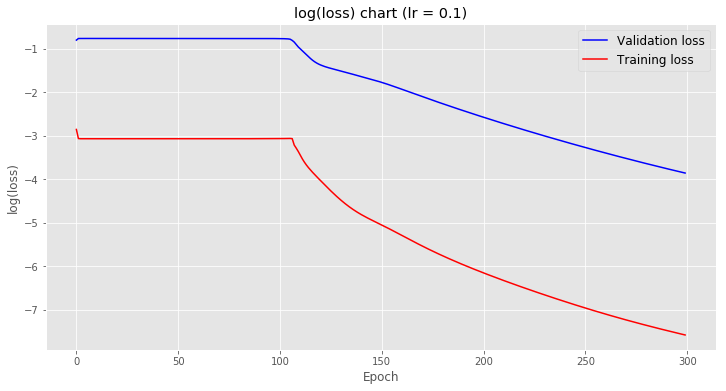

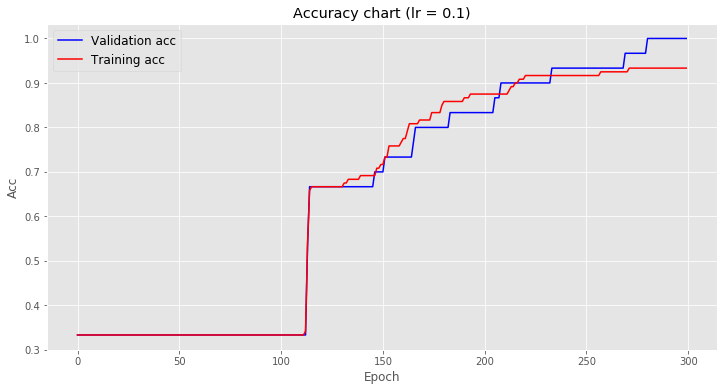

In [57]:
plt.figure(figsize=(12, 6))
plt.plot(np.log(vl2), label = 'Validation loss', color='blue')
plt.plot(np.log(tl2), label = 'Training loss', color='red')
plt.title('log(loss) chart (lr = 0.1)')
plt.xlabel('Epoch')
plt.ylabel('log(loss)')
plt.legend(fontsize=12)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(va2, label = 'Validation acc', color='blue')
plt.plot(ta2, label = 'Training acc', color='red')
plt.title('Accuracy chart (lr = 0.1)')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.legend(fontsize=12)
plt.show()